# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 10</span>

Come nella precedente, in quest'esercitazione viene risolto numericamente il _Traveling salesman problem_ (TSP). A differenza di quella però, si è fatto uso delle librerie MPI (_Message Passing Interface_) per il calcolo parallelo così da compiere contemporaneamente diverse ricerche genetiche del miglior percorso.

## <span style="color:blue"> Esercizio 10.1 </span>

Il codice dell'esercitazione 09 è stato parallelizzato innanzitutto dichiarando due generatori di numeri casuali:
1. uno inizializzato con input **dipendenti dal rank**, cosicché generi numeri diversi in ogni processo.
2. uno inizializzato con input **comuni** ad ogni processo: in questo modo quando verrà chiamato durante le esecuzioni parallele estrarrà gli stessi valori in ogni ramo.

Il primo è quello utilizzato per le funzioni interne e particolari di ogni processo, come la creazione della popolazione e tutto ciò che concerne il GA; il secondo è invece quello utilizzato nei metodi che sono di interesse globale, come la creazione della disposizione delle città e della programmazione dei destinatari nelle comunicazioni.

Infatti ogni processo (chiamato _continente_), ogni $Ngen$ generazioni spedirà il proprio miglior cromosoma ad un altro processo estratto casualmente, e riceverà quello di un altro continente (che può essere lo stesso a cui ha inviato il suo o no).  
Una volta terminate le generazioni, i migliori percorsi di ogni continente vengono raccolti nel primo, dove formano una nuova, ristretta, popolazione. A questo punto non rimane che selezionare e stampare il migliore tra questi, che è sotto riportato nei due esempi dell'esercitazione 09.

### Disposizione circolare

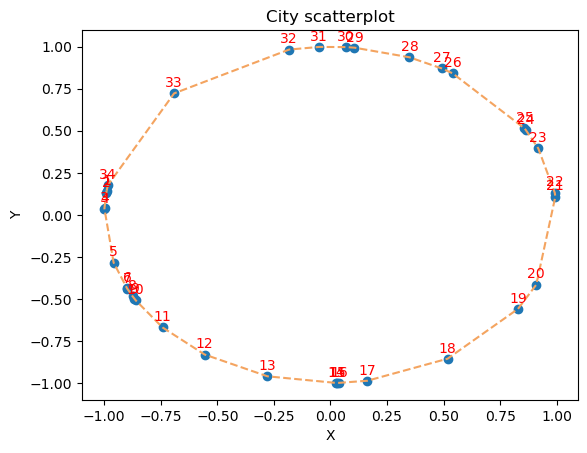

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file
data = np.loadtxt("C.output.out")
### Disposizione circolare
# Estrai le colonne x e y
x = data[:, 0]
y = data[:, 1]

# Crea lo scatterplot
plt.scatter(x, y)

# Aggiungi numeri ai punti
for i, (xi, yi) in enumerate(zip(x, y)):
    offset = 0.02
    plt.text(xi, yi+offset, str(i+1), color='red', ha='center', va='bottom')

# Aggiungi segmenti che uniscono i punti in ordine
plt.plot(x, y, '--', color='sandybrown')

# Traccia il segmento che collega l'ultimo punto al primo punto
plt.plot([x[-1], x[0]], [y[-1], y[0]], '--', color='sandybrown')

# Aggiungi etichette agli assi
plt.xlabel("X")
plt.ylabel("Y")

# Aggiungi un titolo al grafico
plt.title("City scatterplot")

# Mostra il grafico
plt.show()

### Disposizione quadrata

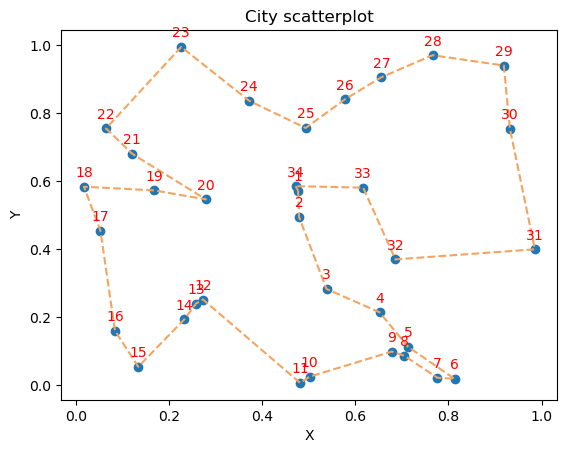

In [2]:
### Disposizione circolare# Carica i dati dal file
data = np.loadtxt("S.output.out")

# Estrai le colonne x e y
x = data[:, 0]
y = data[:, 1]

# Crea lo scatterplot
plt.scatter(x, y)

# Aggiungi numeri ai punti
for i, (xi, yi) in enumerate(zip(x, y)):
    offset = 0.02
    plt.text(xi, yi+offset, str(i+1), color='red', ha='center', va='bottom')

# Aggiungi segmenti che uniscono i punti in ordine
plt.plot(x, y, '--', color='sandybrown')

# Traccia il segmento che collega l'ultimo punto al primo punto
plt.plot([x[-1], x[0]], [y[-1], y[0]], '--', color='sandybrown')

# Aggiungi etichette agli assi
plt.xlabel("X")
plt.ylabel("Y")

# Aggiungi un titolo al grafico
plt.title("City scatterplot")

# Mostra il grafico
plt.show()

## <span style="color:blue"> Esercizio 10.2 </span>

Il codice è stato quindi applicato ad un esmpio reale, trovando una stima della soluzione del TSP per le 50 capitali degli Stati Uniti.

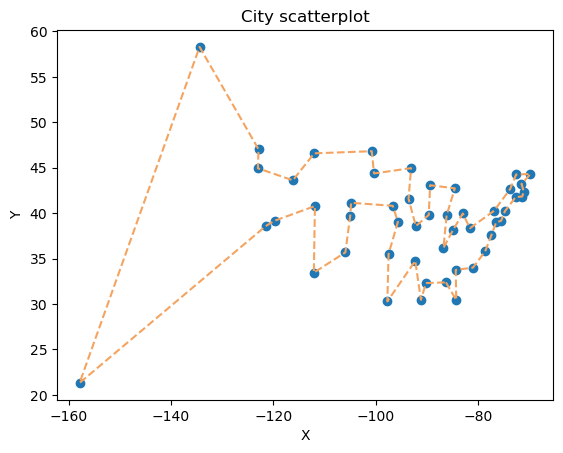

In [3]:
# Carica i dati dal file
data = np.loadtxt("AC.output.out")

# Estrai le colonne x e y
x = data[:, 0]
y = data[:, 1]

# Crea lo scatterplot
plt.scatter(x, y)

# Aggiungi segmenti che uniscono i punti in ordine
plt.plot(x, y, '--', color='sandybrown')

# Traccia il segmento che collega l'ultimo punto al primo punto
plt.plot([x[-1], x[0]], [y[-1], y[0]], '--', color='sandybrown')

# Aggiungi etichette agli assi
plt.xlabel("X")
plt.ylabel("Y")

# Aggiungi un titolo al grafico
plt.title("City scatterplot")

# Mostra il grafico
plt.show()